# data_description.ipynb
This notebook provides some basic information about the analysed population such as the number of patients who had HbA1c tests within the timeframe of interest (Jan 2019 to Jun 2021), breakdown by diabetes status, and distribution of HbA1c values.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from datetime import datetime
from glob import glob

## Data Import

In [2]:
# Variables to import
import_vars = ['patient_id', 'took_hba1c', 'diabetes_type', 'hba1c_mmol_per_mol']

In [3]:
# Read in and append input files
li = []

for file in glob('../output/data/input*.csv'):
    if file.split('_')[1] not in ['ethnicity.csv']:
        df_temp = pd.read_csv(file)[import_vars]
        # Creates date variable based on file name
        df_temp['date'] = file[21:-4]
        df_temp['date'] = df_temp['date'].apply(lambda x: datetime.strptime(x.strip(), '%Y-%m-%d'))
        # Generates a count column
        df_temp['population'] = 1
        li.append(df_temp)
    
df_input = pd.concat(li, axis=0, ignore_index=False).reset_index(drop=True)

In [4]:
# Segment the data by diabetes status
df_t1dm = df_input.loc[df_input.diabetes_type == 'T1DM']
df_t2dm = df_input.loc[df_input.diabetes_type == 'T2DM']

In [5]:
# Subset by thresholds
def thresholds(limit):
    return df_t2dm.loc[df_t2dm.hba1c_mmol_per_mol > limit]

In [6]:
# Segment the data by threshold
df_gt48 = thresholds(48)
df_gt58 = thresholds(58)
df_gt64 = thresholds(64)
df_gt75 = thresholds(75)

## Distribution of HbA1c

In [7]:
# Display distribution
def show_hist(df_in, title):
    print(title)
    plt.hist(df_in.hba1c_mmol_per_mol, bins = 20)
    plt.show()

All Patients


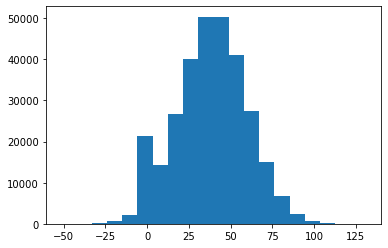

Patients with T2DM & HbA1c > 48


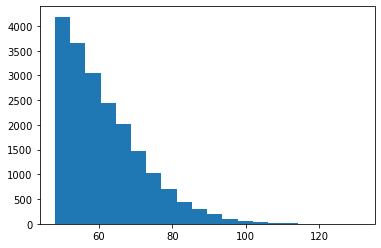

Patients with T2DM & HbA1c > 58


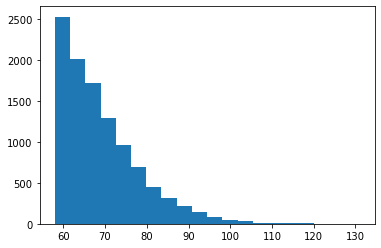

Patients with T2DM & HbA1c > 64


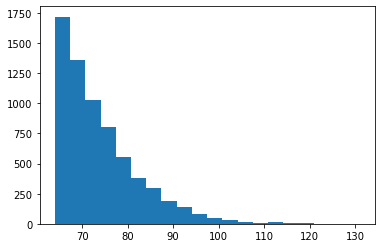

Patients with T2DM & HbA1c > 75


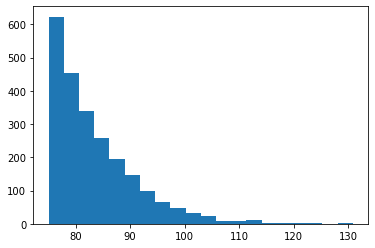

In [8]:
# Full distribution
show_hist(df_input, "All Patients")

# >48
show_hist(df_gt48, "Patients with T2DM & HbA1c > 48")

# >58
show_hist(df_gt58, "Patients with T2DM & HbA1c > 58")

# >64
show_hist(df_gt64, "Patients with T2DM & HbA1c > 64")

# >75
show_hist(df_gt75, "Patients with T2DM & HbA1c > 75")

## Descriptive Statistics

In [9]:
def unique_pat(df_in):
    return df_in.patient_id.nunique()

def num_tests(df_in):
    return df_in.loc[df_in.took_hba1c == 1].patient_id.nunique()

In [10]:
# Population count between Jan 2019 and Jun 2021 by patient cohort

# Total number of patients 
num_total = unique_pat(df_input)

# T1DM patients
num_t1dm = unique_pat(df_t1dm)

# T2DM patients
num_t2dm = unique_pat(df_t2dm)

print("Total patients: {}\nT1DM patients: {}\nT2DM patients: {}".format(num_total, num_t1dm, num_t2dm))

Total patients: 95740
T1DM patients: 8603
T2DM patients: 45347


In [11]:
# Number of HbA1c tests between Jan 2019 and Jun 2021 by patient cohort

# Total
num_total = num_tests(df_input)

# T1DM patients
num_t1dm = num_tests(df_t1dm)

# T2DM patients
num_t2dm = num_tests(df_t2dm)

print("Total patients: {}\nT1DM patients: {}\nT2DM patients: {}".format(num_total, num_t1dm, num_t2dm))

Total patients: 26046
T1DM patients: 887
T2DM patients: 5783


In [12]:
# Segment T2DM patients by thresholds 

# >48
num_gt48 = unique_pat(df_gt48)

# >58 
num_gt58 = unique_pat(df_gt58)

# >64
num_gt64 = unique_pat(df_gt64)

# >75
num_gt75 = unique_pat(df_gt75)

print(
    "T2DM & HbA1c > 48: {}\nT2DM & HbA1c > 58: {}\nT2DM & HbA1c > 64: {}\nT2DM & HbA1c > 75: {}".format(
        num_gt48, num_gt58, num_gt64, num_gt75)
)

T2DM & HbA1c > 48: 17925
T2DM & HbA1c > 58: 9968
T2DM & HbA1c > 64: 6460
T2DM & HbA1c > 75: 2285
